<a href="https://colab.research.google.com/github/antariksh2648/Is-the-road-safe-assignment_PClub/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
import cv2
import numpy as np

In [7]:
new_xtrain = np.zeros((len(X_train),28,28,3))
for i in range(X_train.shape[0]):
  new_xtrain[i]=cv2.cvtColor(X_train[i],cv2.COLOR_GRAY2RGB)

In [8]:
def resize_image_array(img, img_size_dims):
    img = cv2.resize(img, dsize=img_size_dims, 
                     interpolation=cv2.INTER_CUBIC)
    img = np.array(img, dtype=np.float32)
    return img

In [25]:
IMG_DIMS = (32, 32)

new_xtrain = np.array([resize_image_array(img, img_size_dims=IMG_DIMS) for img in new_xtrain])
print('\nnew_xtrain.shape: {}, of {}'.format(new_xtrain.shape, new_xtrain.dtype))


new_xtrain.shape: (60000, 32, 32, 3), of float32


In [12]:
new_xtrain[0].shape

(32, 32, 3)

In [13]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


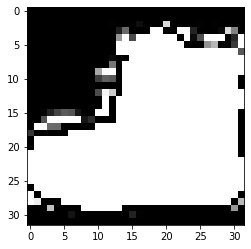

In [14]:
plt.imshow(new_xtrain[0])

In [15]:
from keras.models import Sequential

In [16]:
#only model building part
model=Sequential()
model_part1=tf.keras.applications.ResNet50(
    include_top=False, #deletes the outer layer
    weights="imagenet",
    input_tensor=None,
    input_shape=(32 ,32,3), #according to X_train however check instructions on the page before use
    pooling='avg', #not required but preferred
    classes=3,#according to yoour need
  
)
for layer in model_part1.layers:
    layer.trainable=False

94781440/94765736 [==============================] - 0s 0us/step


In [17]:
from keras.layers import Flatten,Dense

In [18]:
model.add(model_part1)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 24,638,339
Trainable params: 1,050,627
Non-trainable params: 23,587,712
_________________________________________________________________


In [24]:
model.fit(new_xtrain,Y_train/255,epochs=2,validation_split=0.1)

Epoch 1/2
1688/1688 [==============================] - 261s 155ms/step - loss: 3.9295e-10 - accuracy: 0.0994 - val_loss: 2.9802e-10 - val_accuracy: 0.1050
Epoch 2/2
1688/1688 [==============================] - 261s 155ms/step - loss: 6.6227e-12 - accuracy: 0.0994 - val_loss: 2.3842e-10 - val_accuracy: 0.1050
